In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split   
import matplotlib.pyplot as plt
import numpy as np

# Importing Linear Regression
from sklearn.linear_model import LinearRegression
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline

# Preparing Data

In [2]:
#Read both CSV
df=pd.read_csv("unifed_csv_without_duplicated_company.csv")
df.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37198 entries, 0 to 37197
Data columns (total 132 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company_uuid                      37198 non-null  object 
 1   country_code                      33609 non-null  object 
 2   region                            33609 non-null  object 
 3   city                              33609 non-null  object 
 4   operating                         37198 non-null  int64  
 5   closed                            37198 non-null  int64  
 6   success                           37198 non-null  int64  
 7   success_acquired                  37198 non-null  int64  
 8   success_ipo                       37198 non-null  int64  
 9   num_funding_rounds                12036 non-null  float64
 10  total_funding_usd                 9093 non-null   float64
 11  founded_on                        37198 non-null  float64
 12  las

In [3]:
#Create dataframe for features
features=df[["company_uuid","num_funding_rounds", "total_funding_usd","fund_rd_raised_amount_usd","fund_rd_post_money_valuation_usd","fund_rd_investor_count", "investment_count","acquisitions_price_usd","event_count","degree_type", "mean_norm_amount_delta" ]].copy()

#Deal with null value in num_funding_rounds and ROI
features["num_funding_rounds"]=features["num_funding_rounds"].fillna(0)
features["mean_norm_amount_delta"]=features["mean_norm_amount_delta"].fillna(0)
features["total_funding_usd"]=features["total_funding_usd"].fillna(0)
features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37198 entries, 0 to 37197
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company_uuid                      37198 non-null  object 
 1   num_funding_rounds                37198 non-null  float64
 2   total_funding_usd                 37198 non-null  float64
 3   fund_rd_raised_amount_usd         8134 non-null   float64
 4   fund_rd_post_money_valuation_usd  1029 non-null   float64
 5   fund_rd_investor_count            37198 non-null  float64
 6   investment_count                  37198 non-null  float64
 7   acquisitions_price_usd            37198 non-null  float64
 8   event_count                       37198 non-null  float64
 9   degree_type                       37198 non-null  float64
 10  mean_norm_amount_delta            37198 non-null  float64
dtypes: float64(10), object(1)
memory usage: 3.1+ MB


# Plotting Num_funding_round

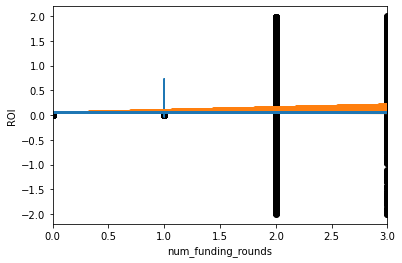

In [4]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["num_funding_rounds"]]
y = features["mean_norm_amount_delta"]

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=20)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c = "black")
plt.xlabel("num_funding_rounds")
plt.ylabel("ROI")
plt.xlim([0,3])
plt.plot(x_poly, y_pred)

In [5]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)

0.08550961272973436

# Plotting total_funding_usd

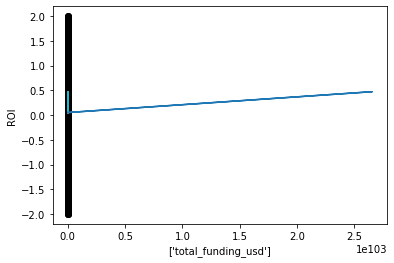

In [6]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["total_funding_usd"]]
y = features["mean_norm_amount_delta"]

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=10)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c = "black")
plt.xlabel(x.columns.values)
plt.ylabel("ROI")
#plt.xlim([0,3])
plt.plot(x_poly, y_pred)

# Plotting fund_rd_investor_count

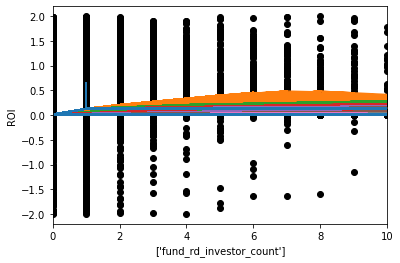

In [7]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["fund_rd_investor_count"]]
y = features["mean_norm_amount_delta"]

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=10)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c = "black")
plt.xlabel(x.columns.values)
plt.ylabel("ROI")
plt.xlim([0,10])
plt.plot(x_poly, y_pred)

# Plotting investment_count

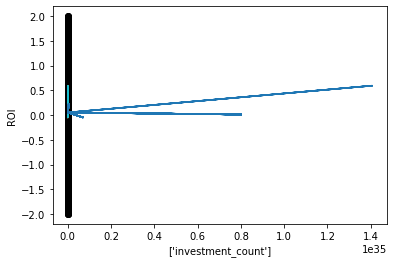

In [8]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["investment_count"]]
y = features["mean_norm_amount_delta"]

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=10)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c = "black")
plt.xlabel(x.columns.values)
plt.ylabel("ROI")
#plt.xlim([0,5])
plt.plot(x_poly, y_pred)

# Plotting acquisitions_price_usd

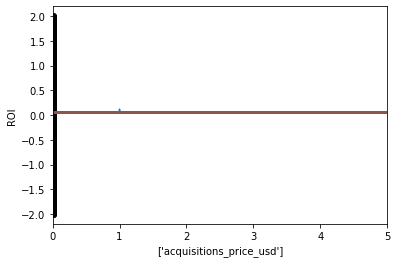

In [9]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["acquisitions_price_usd"]]
y = features["mean_norm_amount_delta"]

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=5)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c = "black")
plt.xlabel(x.columns.values)
plt.ylabel("ROI")
plt.xlim([0,5])
plt.plot(x_poly, y_pred)

# Plotting event_count

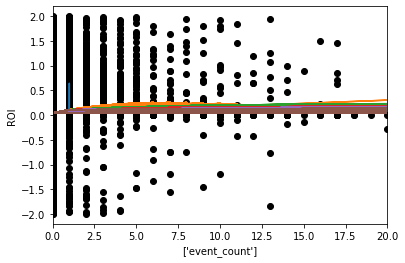

In [10]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["event_count"]]
y = features["mean_norm_amount_delta"]

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=5)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c = "black")
plt.xlabel(x.columns.values)
plt.ylabel("ROI")
plt.xlim([0,20])
plt.plot(x_poly, y_pred)

# Plotting degree_type

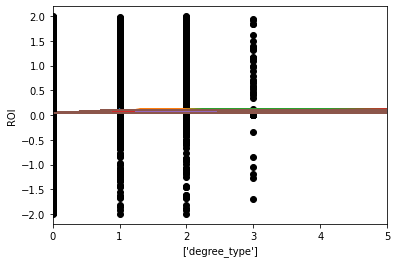

In [11]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
x= features[["degree_type"]]
y = features["mean_norm_amount_delta"]

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=5)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c = "black")
plt.xlabel(x.columns.values)
plt.ylabel("ROI")
plt.xlim([0,5])
plt.plot(x_poly, y_pred)

# Plotting fund_rd_raised_amount_usd

/Users/apple/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


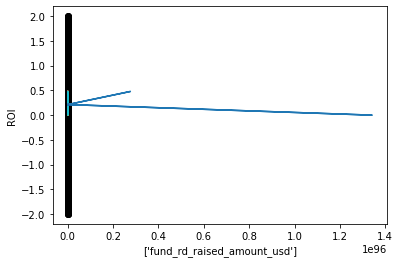

In [11]:
# define independent variables/attirbutes/features
#x = features.drop(columns=['mean_norm_amount_delta', "company_uuid"])
dummy=  features[["fund_rd_raised_amount_usd", "mean_norm_amount_delta"]]
dummy.dropna(subset=['fund_rd_raised_amount_usd'] , inplace=True)

x= dummy[["fund_rd_raised_amount_usd"]]
y = dummy["mean_norm_amount_delta"]

#Change degree of x to fit into the model

pre_process= PolynomialFeatures(degree=10)

x_poly= pre_process.fit_transform(x)
x_poly

# Training the model
pr_model= LinearRegression()

# Fit our preprocessed data to the polynomial regression model
pr_model.fit(x_poly, y)
# Store our predicted ROI values in the variable y_pred
y_pred = pr_model.predict(x_poly)

# Plot our model on our data
plt.scatter(x, y, c = "black")
plt.xlabel(x.columns.values)
plt.ylabel("ROI")
#plt.xlim([0,3])
plt.plot(x_poly, y_pred)